# [Example] Build a scorecard with high explainability and good predictability with Scorecard-Bundle

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Task-Defination" data-toc-modified-id="Task-Defination-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Task Defination</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Download-sample-data" data-toc-modified-id="Download-sample-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Download sample data</a></span></li><li><span><a href="#Handle-categorical-features-and-missing-values" data-toc-modified-id="Handle-categorical-features-and-missing-values-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Handle categorical features and missing values</a></span></li><li><span><a href="#Define-feature-and-target" data-toc-modified-id="Define-feature-and-target-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Define feature and target</a></span></li></ul></li><li><span><a href="#Scorecard-Model" data-toc-modified-id="Scorecard-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Scorecard Model</a></span><ul class="toc-item"><li><span><a href="#Feature-Discretization-with-ChiMerge" data-toc-modified-id="Feature-Discretization-with-ChiMerge-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Feature Discretization with ChiMerge</a></span></li><li><span><a href="#Evaluate-Predictabilty" data-toc-modified-id="Evaluate-Predictabilty-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Evaluate Predictabilty</a></span></li><li><span><a href="#Feature-Engineering-(manually-adjusting-feature-intervals)" data-toc-modified-id="Feature-Engineering-(manually-adjusting-feature-intervals)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Feature Engineering (manually adjusting feature intervals)</a></span><ul class="toc-item"><li><span><a href="#latitude" data-toc-modified-id="latitude-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>latitude</a></span></li><li><span><a href="#median_income" data-toc-modified-id="median_income-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>median_income</a></span></li><li><span><a href="#total_rooms" data-toc-modified-id="total_rooms-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>total_rooms</a></span></li><li><span><a href="#total_bedrooms" data-toc-modified-id="total_bedrooms-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>total_bedrooms</a></span></li><li><span><a href="#housing_median_age" data-toc-modified-id="housing_median_age-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>housing_median_age</a></span></li><li><span><a href="#longitude" data-toc-modified-id="longitude-3.3.6"><span class="toc-item-num">3.3.6&nbsp;&nbsp;</span>longitude</a></span></li><li><span><a href="#population" data-toc-modified-id="population-3.3.7"><span class="toc-item-num">3.3.7&nbsp;&nbsp;</span>population</a></span></li><li><span><a href="#households" data-toc-modified-id="households-3.3.8"><span class="toc-item-num">3.3.8&nbsp;&nbsp;</span>households</a></span></li></ul></li><li><span><a href="#Feature-Encoding-with-Weight-of-Evidence-(WOE)" data-toc-modified-id="Feature-Encoding-with-Weight-of-Evidence-(WOE)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Feature Encoding with Weight of Evidence (WOE)</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Feature Selection</a></span></li><li><span><a href="#Model-Training" data-toc-modified-id="Model-Training-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Model Training</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Model Evaluation</a></span><ul class="toc-item"><li><span><a href="#Train" data-toc-modified-id="Train-3.7.1"><span class="toc-item-num">3.7.1&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Validation" data-toc-modified-id="Validation-3.7.2"><span class="toc-item-num">3.7.2&nbsp;&nbsp;</span>Validation</a></span></li></ul></li></ul></li></ul></div>

## Task Defination

Build a Scorecard model with high explainability and satisfying performance to rate house prices. Demonstrations in section 3.3 shows how to visualize a feature' distribution and event rate with Scorecard-Bundle and manually adjust feature intervals accordingly in order to get an explainable Scorecard model.

## Data Preparation

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from datetime import datetime
import copy

plt.style.use('seaborn-colorblind')
plt.rcParams['font.sans-serif'] = ['SimHei']  # Enable display of Chinese characters
plt.rcParams['axes.unicode_minus'] = False  # Enable display of negative sign '-'

plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 150

# Font settings
font_text = {'family':'SimHei', 
        'weight':'normal',
         'size':11,
        } # Font setting for normal texts

font_title = {'family':'SimHei',
        'weight':'bold',
         'size':14,
        } # Font setting for title

# Thousands seperator
from matplotlib.ticker import FuncFormatter 
def format_thousands(x,pos):
    return '{:,.0f}'.format(x,pos)
formatter_thousands = FuncFormatter(format_thousands)

### Download sample data

In [2]:
# The folowing codes for downloading housing price dataset is from 
# Aurélien Géron's book "Hands on Machine Learning with Scikit-learn and Tensorflow"
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

fetch_housing_data()

In [3]:
housing = load_housing_data()
print(housing.columns)
print('shape:',housing.shape)
housing.head()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
shape: (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Handle categorical features and missing values

In [4]:
housing.drop(['ocean_proximity'], axis=1, inplace=True) # drop the categorical feature for simplicity

In [5]:
housing.isna().sum() # check for missing values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [6]:
housing.fillna(value=housing.total_bedrooms.median(), inplace=True) # fill the missing `total_bedrooms` with its median for simplicity

### Define feature and target

- Let `median_house_value` be the target and all other columns be features


- No train test splitting here for simplicity


- Set y=1 when medain house value is larger than its q90 and y=0 otherwise

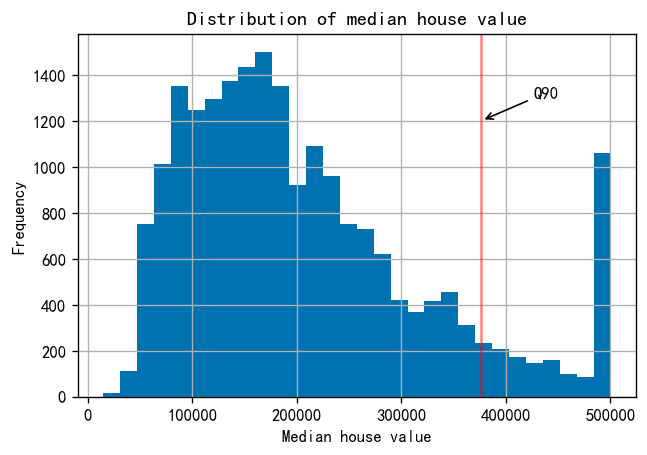

In [7]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind') # Set style for matplotlib
plt.rcParams['savefig.dpi'] = 300 # dpi of diagrams
plt.rcParams['figure.dpi'] = 120

housing.median_house_value.hist(bins=30)
plt.axvline(x=housing.median_house_value.quantile(0.9), c='r', alpha=0.5)
plt.annotate(s='Q90',xy=(housing.median_house_value.quantile(0.9),1200),
            xytext=(housing.median_house_value.quantile(0.9)+50000,1300),
            arrowprops={'arrowstyle':'->'})
plt.title('Distribution of median house value')
plt.ylabel('Frequency')
plt.xlabel('Median house value')
plt.show()

In [8]:
features = list(set(housing.columns) - set(['median_house_value'])) # feature name list
q90 = housing.median_house_value.quantile(0.9)
X_all, y_all = housing[features], housing.median_house_value.map(lambda x: 1 if x>q90 else 0)

In [9]:
print(X_all.shape)
print(y_all.shape)
y_all.value_counts(normalize=True)

(20640, 8)
(20640,)


0    0.900048
1    0.099952
Name: median_house_value, dtype: float64

In [4]:
from sklearn.model_selection import train_test_split
X, X_val, y, y_val = train_test_split(X_all, y_all, test_size=0.4, stratify=y_all, random_state=42)
print(X.shape)
print(y.shape)
print(X_val.shape)
print(y_val.shape)

(12384, 8)
(12384,)
(8256, 8)
(8256,)


In [5]:
y.value_counts(normalize=True)

0    0.900032
1    0.099968
Name: median_house_value, dtype: float64

In [6]:
y_val.value_counts(normalize=True)

0    0.900073
1    0.099927
Name: median_house_value, dtype: float64

## Scorecard Model

In [7]:
from scorecardbundle.feature_discretization import ChiMerge as cm
from scorecardbundle.feature_discretization import FeatureIntervalAdjustment as fia
from scorecardbundle.feature_encoding import WOE as woe
from scorecardbundle.feature_selection import FeatureSelection as fs
from scorecardbundle.model_training import LogisticRegressionScoreCard as lrsc
from scorecardbundle.model_evaluation import ModelEvaluation as me

# import sys
# from imp import reload
# sys.path.append('D:\\WH_Codes\\Github\\Scorecard-Bundle\\scorecardbundle')
# from feature_discretization import ChiMerge as cm
# from feature_discretization import FeatureIntervalAdjustment as fia
# from feature_encoding import WOE as woe
# from feature_selection import FeatureSelection as fs
# from model_training import LogisticRegressionScoreCard as lrsc
# from model_evaluation import ModelEvaluation as me
# reload(cm)
# reload(fia)
# reload(woe)
# reload(fs)
# reload(lrsc)
# reload(me)
# import numpy as np

### Feature Discretization with ChiMerge

In [8]:
trans_cm = cm.ChiMerge(max_intervals=10, min_intervals=5, output_dataframe=True)
result_cm = trans_cm.fit_transform(X, y) 
result_cm.head()

,latitude,households,median_income,total_rooms,housing_median_age,total_bedrooms,longitude,population
0,33.63~34.1,416.0~780.0,3.9625~5.102880000000001,2577.29~2660.9500000000007,36.0~45.0,501.0~690.0,-118.37~-117.82,877.0~1274.0
1,33.63~34.1,416.0~780.0,3.9625~5.102880000000001,2660.9500000000007~4328.040000000001,17.0~24.0,501.0~690.0,-117.77~-117.14,1274.0~2812.0
2,33.63~34.1,416.0~780.0,2.875~3.5625,1837.0~2501.0,36.0~45.0,341.0~481.0,-118.37~-117.82,1274.0~2812.0
3,37.99~inf,416.0~780.0,3.9625~5.102880000000001,2660.9500000000007~4328.040000000001,25.0~36.0,341.0~481.0,-inf~-122.6,877.0~1274.0
4,33.63~34.1,416.0~780.0,-inf~2.875,1141.0~1812.0,36.0~45.0,341.0~481.0,-118.37~-117.82,1274.0~2812.0


In [9]:
# with open('data.pkl','wb') as f:
#     pickle.dump([X_all,y_all,result_cm],f)
# with open('data.pkl','rb') as f:
#     X_all,y_all,result_cm = pickle.load(f)

In [10]:
trans_cm.boundaries_ # show boundaries for all features

{'latitude': array([33.2464, 33.63  , 34.1   , 34.16  , 34.47  , 37.12  , 37.59  ,
        37.75  , 37.99  ,     inf]),
 'households': array([ 249.  ,  260.  ,  405.  ,  416.  ,  780.  ,  835.  ,  863.  ,
        1263.36,     inf]),
 'median_income': array([2.875   , 3.5625  , 3.9625  , 5.10288 , 5.765463, 6.340365,
        6.953202, 7.737496, 8.925106,      inf]),
 'total_rooms': array([ 1141.  ,  1812.  ,  1837.  ,  2501.  ,  2577.29,  2660.95,
         4328.04, 11345.35,      inf]),
 'housing_median_age': array([ 9., 17., 24., 25., 36., 45., 47., 51., inf]),
 'total_bedrooms': array([ 276.  ,  293.  ,  336.  ,  341.  ,  481.  ,  501.  ,  690.  ,
        1378.36, 2221.02,     inf]),
 'longitude': array([-122.6 , -122.37, -121.59, -119.85, -118.7 , -118.37, -117.82,
        -117.77, -117.14,     inf]),
 'population': array([ 351.,  420.,  455.,  679.,  694.,  877., 1274., 2812.,   inf])}

### Evaluate Predictabilty

In [11]:
trans_woe = woe.WOE_Encoder(output_dataframe=True)
result_woe = trans_woe.fit_transform(result_cm, y) 
result_woe.head()

,latitude,households,median_income,total_rooms,housing_median_age,total_bedrooms,longitude,population
0,-0.034265,-0.064078,-0.295228,-0.287323,0.163228,-0.171338,-0.298504,0.060771
1,-0.034265,-0.064078,-0.295228,0.313985,-0.186310,-0.171338,-0.226080,-0.231549
2,-0.034265,-0.064078,-1.056799,-0.079896,0.163228,-0.095802,-0.298504,-0.231549
3,-2.662229,-0.064078,-0.295228,0.313985,-0.045839,-0.095802,-2.622698,0.060771
4,-0.034265,-0.064078,-2.194393,-0.298689,0.163228,-0.095802,-0.298504,-0.231549


In [12]:
trans_woe.iv_

{'latitude': 0.9188848359201576,
 'households': 0.04520948775780158,
 'median_income': 2.5275362958451018,
 'total_rooms': 0.14588851453833607,
 'housing_median_age': 0.20751454296816324,
 'total_bedrooms': 0.048648591690680476,
 'longitude': 1.128061961932436,
 'population': 0.08308055417160577}

### Feature Engineering (manually adjusting feature intervals)

Analyze the sample distribution and event rate distribution for each feature, and adjust the feature intervals so that the feature's predictability is intuitive to humen (high expalinability). Of course the feature need to maintain a reasonable predicbility (e.g. has a IV larger than 0.02) 

In [13]:
feature_list = []

#### latitude

       x_b  event_freq  sample_size  event_rate
0  33.2464          66          991    0.066599
1  33.6300          79          266    0.296992
2  34.1000         369         3807    0.096927
3  34.1600         139          551    0.252269
4  34.4700          96          949    0.101159
5  37.1200          27         1368    0.019737
6  37.5900         231          997    0.231695
7  37.7500          33          631    0.052298
8  37.9900         184         1004    0.183267
9      inf          14         1820    0.007692


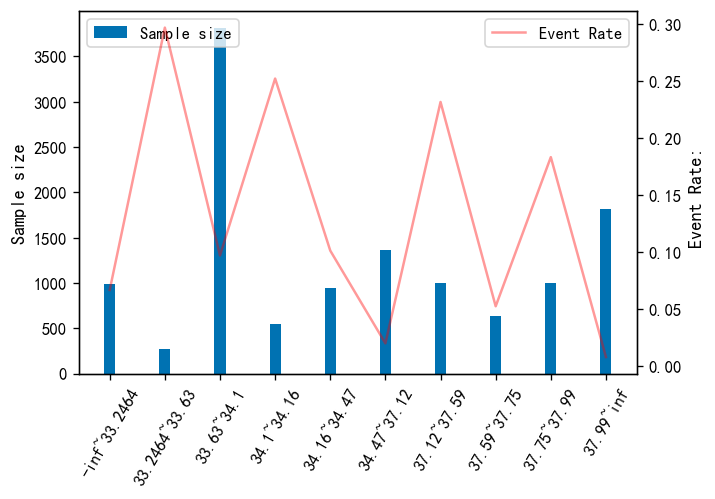

In [14]:
fia.plot_event_dist(result_cm['latitude'],y,x_rotation=60)

In [15]:
new_x = cm.assign_interval_str(X['latitude'].values,[34,37.6]) # pass new interval boundaries
woe.woe_vector(new_x, y.values)

({'-inf~34.0': -0.12665884912551398,
  '34.0~37.6': 0.3000172002209526,
  '37.6~inf': -0.4470970730286582},
 0.09330096146239328)

    x_b  event_freq  sample_size  event_rate
0  34.0         338         3792    0.089135
1  37.6         672         5154    0.130384
2   inf         228         3438    0.066318


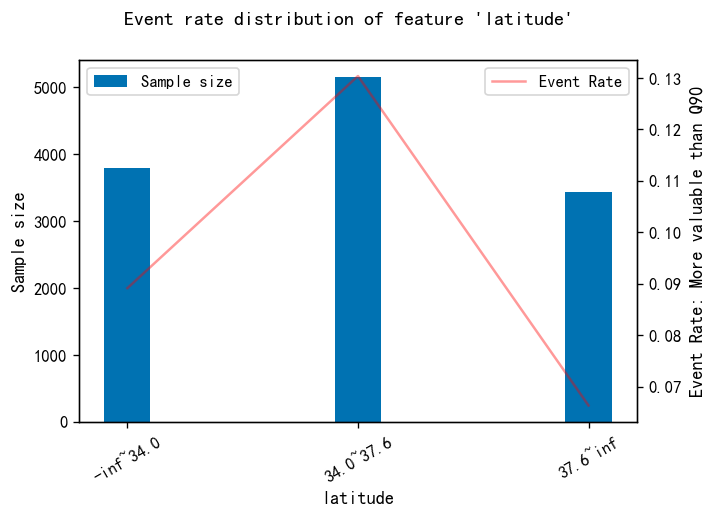

In [16]:
fia.plot_event_dist(new_x,y,title="Event rate distribution of feature 'latitude'", x_label='latitude',y_label='More valuable than Q90',
                   x_rotation=30,save=True)

In [17]:
result_cm['latitude'] = new_x # reasonable explainability and predictability. Select.
feature_list.append('latitude')
print(feature_list)

['latitude']


#### median_income

        x_b  event_freq  sample_size  event_rate
0  2.875000          50         4090    0.012225
1  3.562500          83         2233    0.037170
2  3.962500          59         1109    0.053201
3  5.102880         189         2475    0.076364
4  5.765463         122          867    0.140715
5  6.340365         107          495    0.216162
6  6.953202         112          372    0.301075
7  7.737496         105          247    0.425101
8  8.925106         178          248    0.717742
9       inf         233          248    0.939516


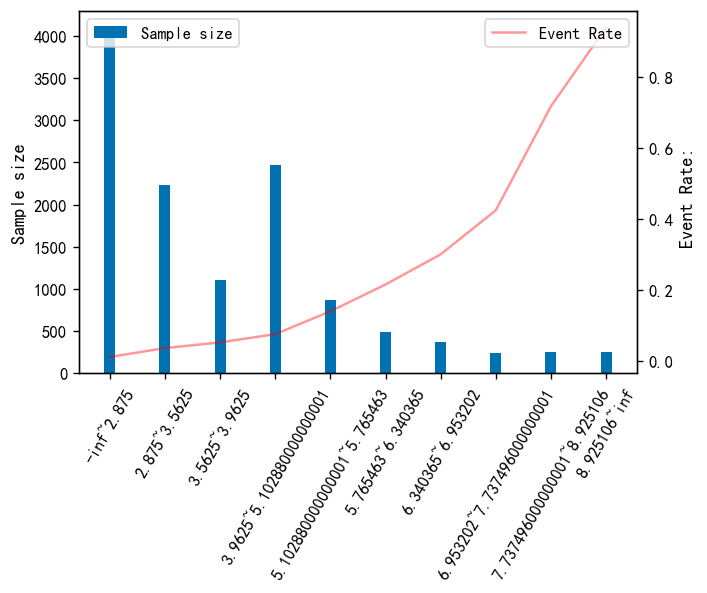

In [18]:
col = 'median_income'
fia.plot_event_dist(result_cm[col],y,x_rotation=60)

perfect curve. reasonable explainability and high iv. 

In [19]:
feature_list.append(col)
print(feature_list)

['latitude', 'median_income']


#### total_rooms

        x_b  event_freq  sample_size  event_rate
0   1141.00          99         1862    0.053169
1   1812.00         226         2969    0.076120
2   1837.00          20          127    0.157480
3   2501.00         242         2602    0.093005
4   2577.29          33          242    0.136364
5   2660.95          19          247    0.076923
6   4328.04         376         2849    0.131976
7  11345.35         215         1362    0.157856
8       inf           8          124    0.064516


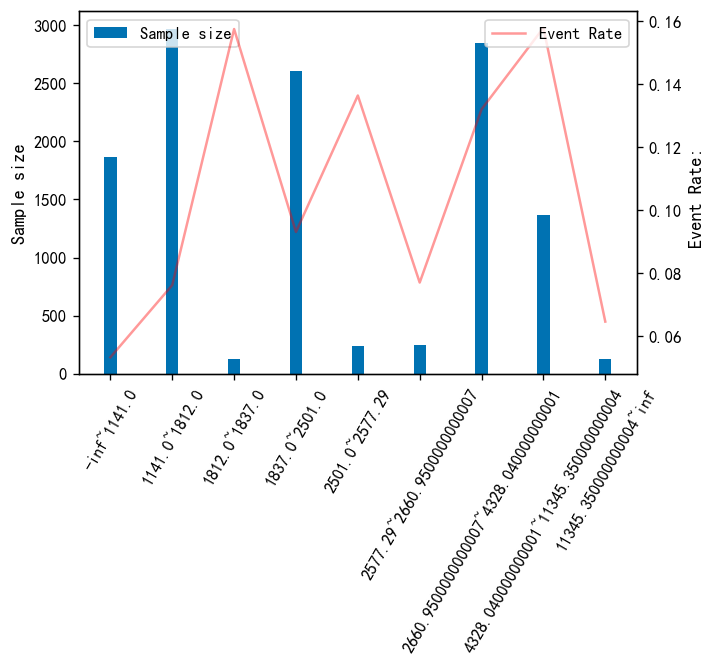

In [20]:
col = 'total_rooms'
fia.plot_event_dist(result_cm[col],y,x_rotation=60)

In [21]:
new_x = cm.assign_interval_str(X[col].values,[1176,2012,2499,4178]) # pass new interval boundaries
woe.woe_vector(new_x, y.values)

({'-inf~1176.0': -0.7003111163731507,
  '1176.0~2012.0': -0.23632219621015746,
  '2012.0~2499.0': -0.02257507987839241,
  '2499.0~4178.0': 0.2944104574601201,
  '4178.0~inf': 0.4304451292118589},
 0.12825413939140448)

      x_b  event_freq  sample_size  event_rate
0  1176.0         103         1971    0.052258
1  2012.0         300         3721    0.080623
2  2499.0         182         1858    0.097955
3  4178.0         420         3237    0.129750
4     inf         233         1597    0.145899


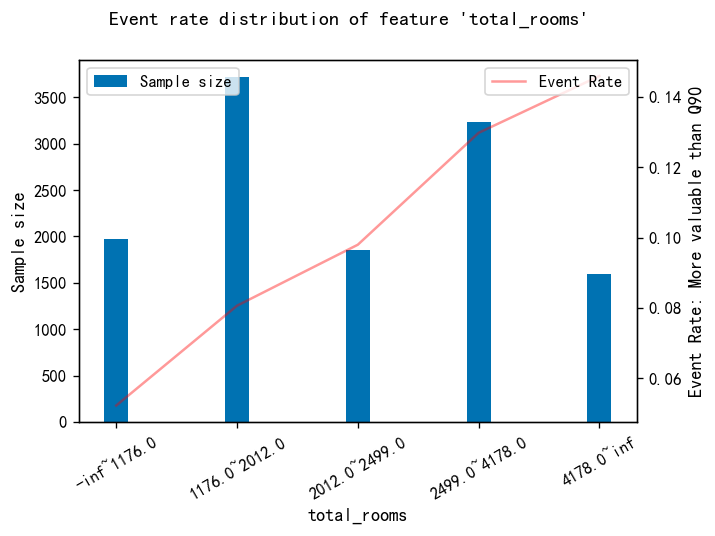

In [22]:
fia.plot_event_dist(new_x,y,title=f"Event rate distribution of feature '{col}'", x_label=col,y_label='More valuable than Q90',
                   x_rotation=30,save=True)

In [23]:
result_cm[col] = new_x # reasonable explainability and predictability. Select.
feature_list.append(col)
print(feature_list)

['latitude', 'median_income', 'total_rooms']


#### total_bedrooms

       x_b  event_freq  sample_size  event_rate
0   276.00         259         2606    0.099386
1   293.00          54          388    0.139175
2   336.00          97          980    0.098980
3   341.00           3          116    0.025862
4   481.00         273         2978    0.091672
5   501.00          49          363    0.134986
6   690.00         191         2232    0.085573
7  1378.36         276         2225    0.124045
8  2221.02          32          372    0.086022
9      inf           4          124    0.032258


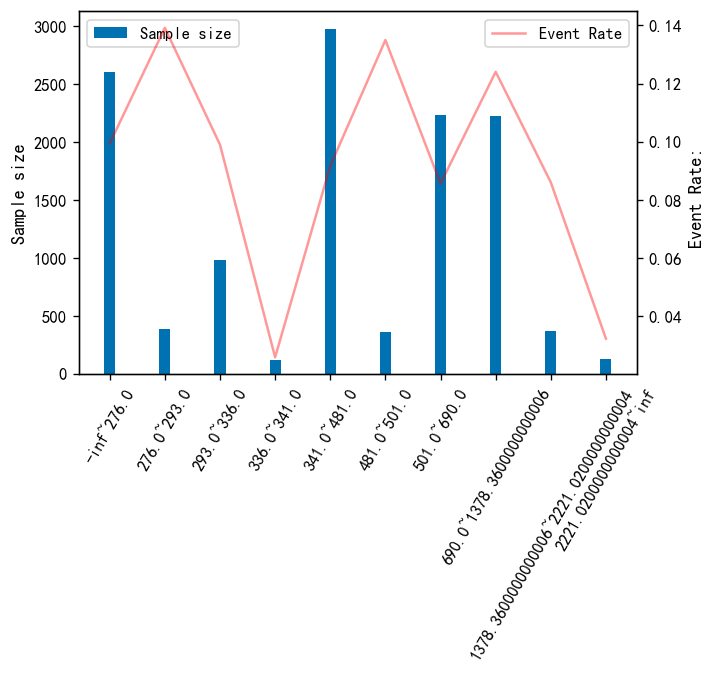

In [24]:
fia.plot_event_dist(result_cm['total_bedrooms'],y,x_rotation=60)

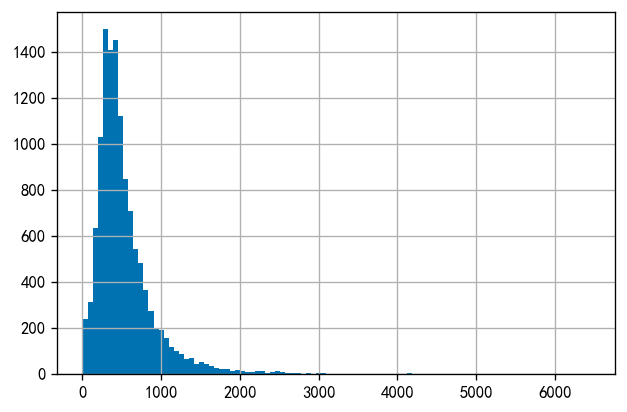

In [25]:
X['total_bedrooms'].hist(bins=100)

In [26]:
X['total_bedrooms'].quantile([0.2,0.4,0.6,0.8])

0.2    271.0
0.4    380.0
0.6    501.0
0.8    722.0
Name: total_bedrooms, dtype: float64

In [27]:
new_x = cm.assign_interval_str(X['total_bedrooms'].values,[100,396,685])
woe.woe_vector(new_x, y.values)

({'-inf~100.0': 0.02103914198355618,
  '100.0~396.0': -0.038028230151452826,
  '396.0~685.0': -0.06167440655995571,
  '685.0~inf': 0.1491740816386107},
 0.007134419415836838)

     x_b  event_freq  sample_size  event_rate
0  100.0          38          373    0.101877
1  396.0         477         4938    0.096598
2  685.0         408         4315    0.094554
3    inf         315         2758    0.114213


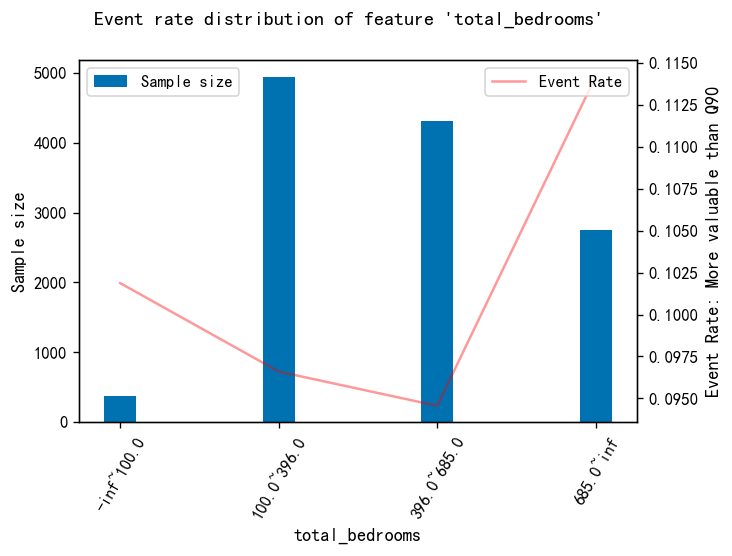

In [28]:
fia.plot_event_dist(new_x,y,title="Event rate distribution of feature 'total_bedrooms'", x_label='total_bedrooms',
                    y_label='More valuable than Q90',
                   x_rotation=60,save=True)

iv is too low. drop

#### housing_median_age

    x_b  event_freq  sample_size  event_rate
0   9.0          73          799    0.091364
1  17.0         100         2031    0.049237
2  24.0         170         2014    0.084409
3  25.0          50          344    0.145349
4  36.0         376         3920    0.095918
5  45.0         224         1937    0.115643
6  47.0          17          270    0.062963
7  51.0          37          310    0.119355
8   inf         191          759    0.251647


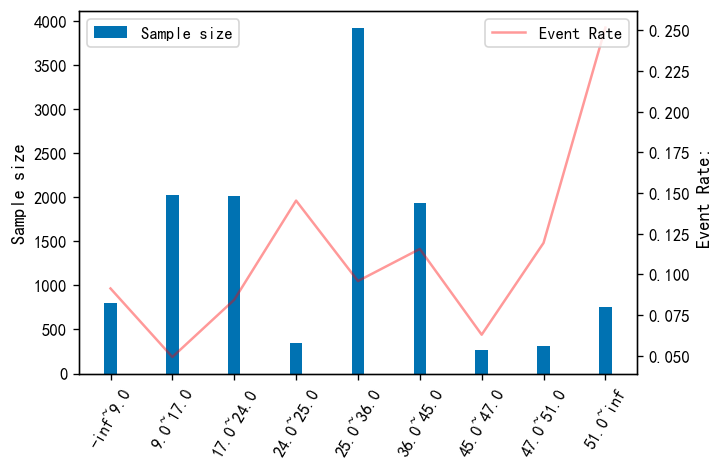

In [29]:
col = 'housing_median_age'
fia.plot_event_dist(result_cm[col],y,x_rotation=60)

In [30]:
new_x = cm.assign_interval_str(X[col].values,[33,45]) # pass new interval boundaries
woe.woe_vector(new_x, y.values)

({'-inf~33.0': -0.21406011499136973,
  '33.0~45.0': 0.08363199161936338,
  '45.0~inf': 0.7012457415969229},
 0.09816803871772663)

    x_b  event_freq  sample_size  event_rate
0  33.0         637         7741    0.082289
1  45.0         356         3304    0.107748
2   inf         245         1339    0.182972


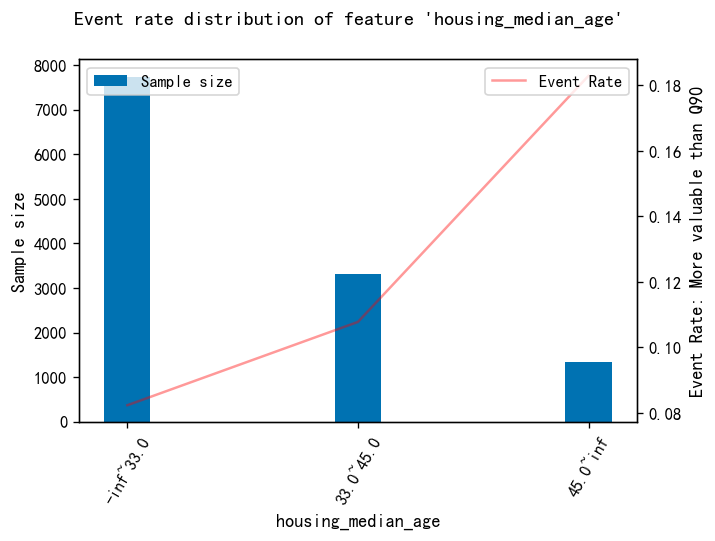

In [31]:
fia.plot_event_dist(new_x,y,title=f"Event rate distribution of feature '{col}'", x_label=col,
                    y_label='More valuable than Q90',
                   x_rotation=60,save=True)

In [32]:
result_cm[col] = new_x # great explainability and predictability. Select.
feature_list.append(col)
print(feature_list)

['latitude', 'median_income', 'total_rooms', 'housing_median_age']


#### longitude

      x_b  event_freq  sample_size  event_rate
0 -122.60           3          375    0.008000
1 -122.37         183          621    0.294686
2 -121.59         291         2353    0.123672
3 -119.85          11         1620    0.006790
4 -118.70          53          978    0.054192
5 -118.37         305          912    0.334430
6 -117.82         252         3310    0.076133
7 -117.77          29          113    0.256637
8 -117.14         101         1241    0.081386
9     inf          10          861    0.011614


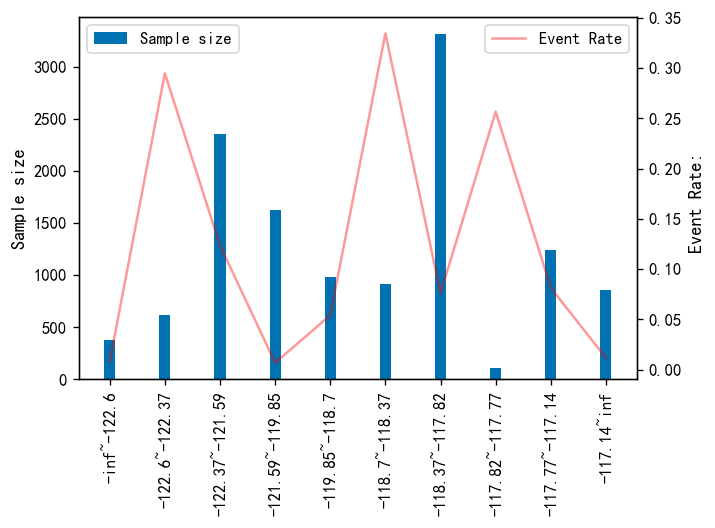

In [33]:
col = 'longitude'
fia.plot_event_dist(result_cm[col],y,x_rotation=90)

In [34]:
new_x = cm.assign_interval_str(X[col].values,[-122.41,-118.37]) # pass new interval boundaries
woe.woe_vector(new_x, y.values)

({'-118.37~inf': -0.3746002086398019,
  '-122.41~-118.37': 0.15249934721481329,
  '-inf~-122.41': 0.6847900044182643},
 0.11101533122863683)

      x_b  event_freq  sample_size  event_rate
0 -122.41         165          914    0.180525
1 -118.37         681         5945    0.114550
2     inf         392         5525    0.070950


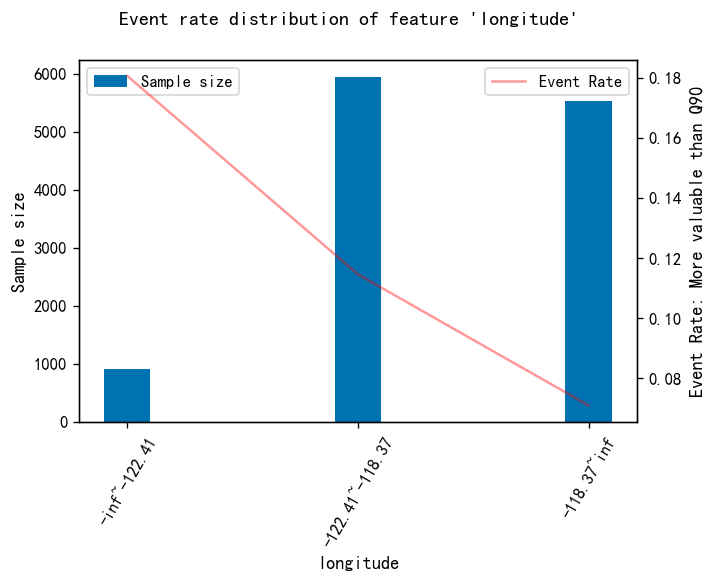

In [35]:
fia.plot_event_dist(new_x,y,title=f"Event rate distribution of feature '{col}'", x_label=col,
                    y_label='More valuable than Q90',
                   x_rotation=60,save=True)

In [36]:
result_cm[col] = new_x # great explainability and predictability. Select.
feature_list.append(col)
print(feature_list)

['latitude', 'median_income', 'total_rooms', 'housing_median_age', 'longitude']


#### population

      x_b  event_freq  sample_size  event_rate
0   351.0          64          622    0.102894
1   420.0          37          247    0.149798
2   455.0          10          125    0.080000
3   679.0         172         1240    0.138710
4   694.0           8          121    0.066116
5   877.0         204         1493    0.136638
6  1274.0         326         3088    0.105570
7  2812.0         361         4458    0.080978
8     inf          56          990    0.056566


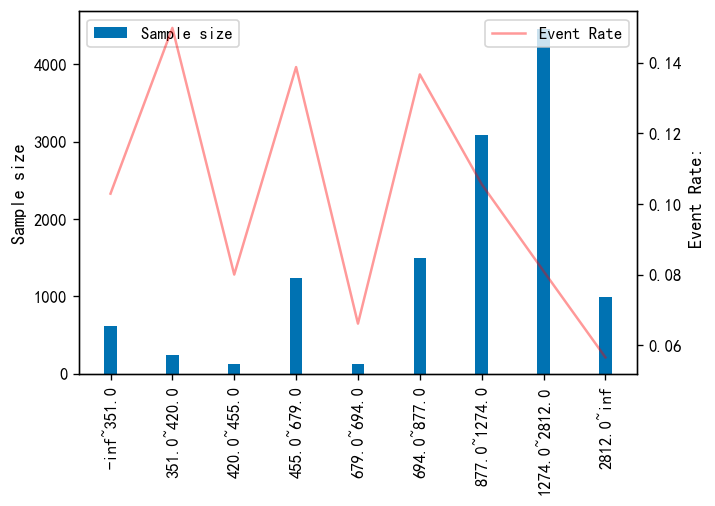

In [37]:
col = 'population'
fia.plot_event_dist(result_cm[col],y,x_rotation=90)

In [38]:
new_x = cm.assign_interval_str(X[col].values,[873,992,1275,1529,3570]) # pass new interval boundaries
woe.woe_vector(new_x, y.values)

({'-inf~873.0': 0.2876654505272535,
  '1275.0~1529.0': -0.22795640294267666,
  '1529.0~3570.0': -0.26228705751209963,
  '3570.0~inf': -0.8196549645635786,
  '873.0~992.0': 0.08461928035791394,
  '992.0~1275.0': 0.04497214401455609},
 0.07193530955126093)

      x_b  event_freq  sample_size  event_rate
0   873.0         493         3822    0.128990
1   992.0         110         1020    0.107843
2  1275.0         219         2104    0.104087
3  1529.0         120         1477    0.081246
4  3570.0         273         3468    0.078720
5     inf          23          493    0.046653


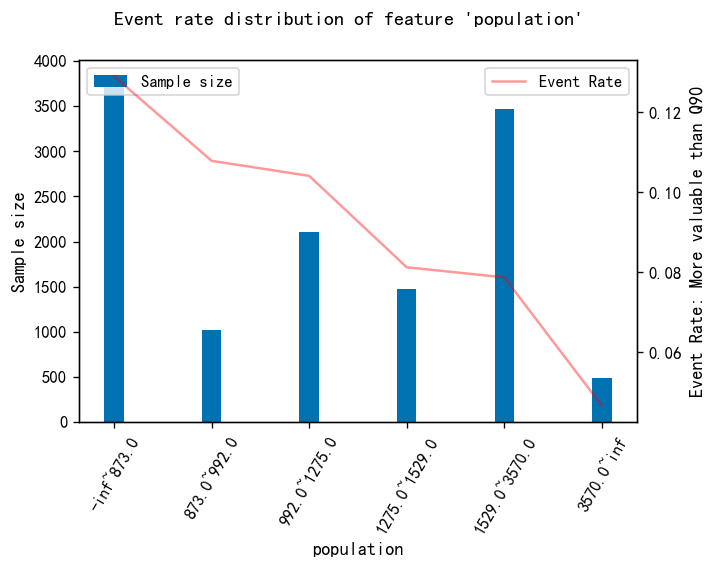

In [39]:
fia.plot_event_dist(new_x,y,title=f"Event rate distribution of feature '{col}'", x_label=col,
                    y_label='More valuable than Q90',
                   x_rotation=60,save=True)

In [40]:
result_cm[col] = new_x # great explainability and predictability. Select.
feature_list.append(col)
print(feature_list)

['latitude', 'median_income', 'total_rooms', 'housing_median_age', 'longitude', 'population']


#### households

       x_b  event_freq  sample_size  event_rate
0   249.00         229         2374    0.096462
1   260.00          39          233    0.167382
2   405.00         317         3472    0.091302
3   416.00          41          240    0.170833
4   780.00         409         4335    0.094348
5   835.00          39          245    0.159184
6   863.00           8          124    0.064516
7  1263.36         119          865    0.137572
8      inf          37          496    0.074597


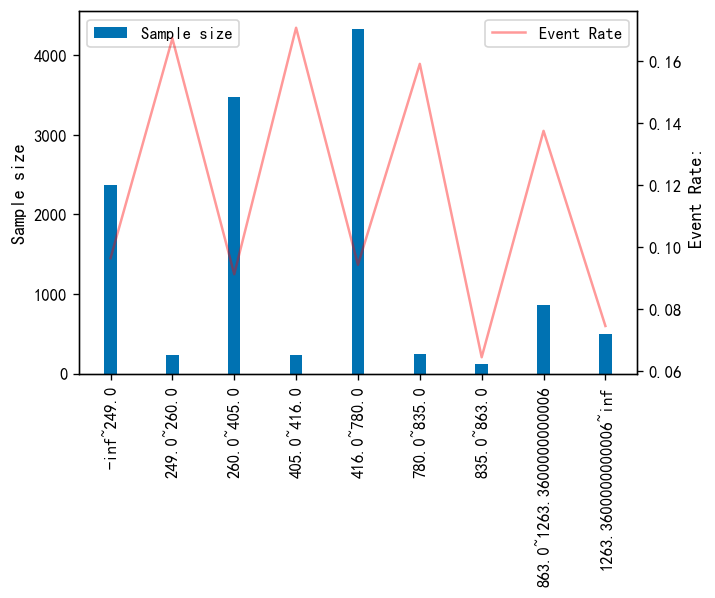

In [41]:
col = 'households'
fia.plot_event_dist(result_cm[col],y,x_rotation=90)

In [42]:
new_x = cm.assign_interval_str(X[col].values,[260,415,853]) # pass new interval boundaries
woe.woe_vector(new_x, y.values)

({'-inf~260.0': 0.031091728008190586,
  '260.0~415.0': -0.04534753112672321,
  '415.0~853.0': -0.030353649936073843,
  '853.0~inf': 0.14989067070536102},
 0.0038487081700415583)

     x_b  event_freq  sample_size  event_rate
0  260.0         268         2607    0.102800
1  415.0         354         3689    0.095961
2  853.0         456         4688    0.097270
3    inf         160         1400    0.114286


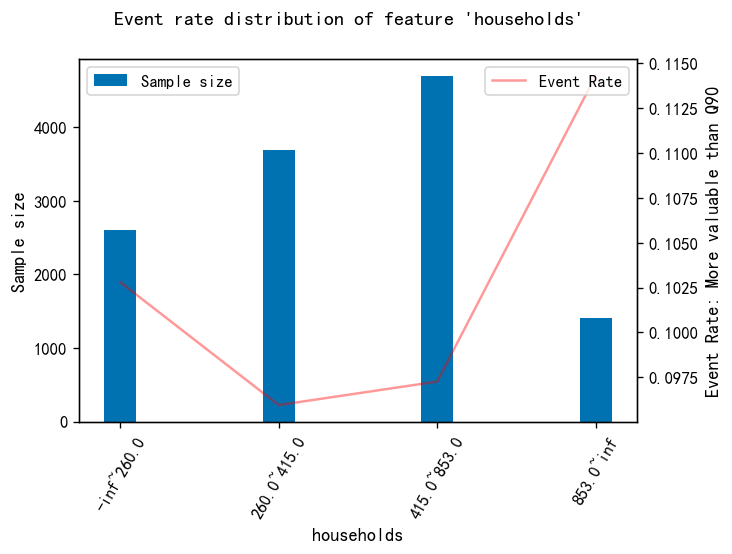

In [43]:
fia.plot_event_dist(new_x,y,title=f"Event rate distribution of feature '{col}'", x_label=col,
                    y_label='More valuable than Q90',
                   x_rotation=60,save=True)

iv is too low. drop

### Feature Encoding with Weight of Evidence (WOE)

In [44]:
trans_woe = woe.WOE_Encoder(output_dataframe=True)
result_woe = trans_woe.fit_transform(result_cm[feature_list], y) # WOE is fast. This only takes less then 1 seconds
result_woe.head()

,latitude,median_income,total_rooms,housing_median_age,longitude,population
0,-0.126659,-0.295228,0.294410,0.083632,-0.37460,0.044972
1,0.300017,-0.295228,0.294410,-0.214060,-0.37460,-0.262287
2,-0.126659,-1.056799,-0.236322,0.083632,-0.37460,-0.262287
3,-0.447097,-0.295228,0.294410,-0.214060,0.68479,0.044972
4,0.300017,-2.194393,-0.236322,0.083632,-0.37460,-0.262287


In [45]:
trans_woe.iv_ # the information value (iv) for each feature

{'latitude': 0.09330096146239328,
 'median_income': 2.5275362958451018,
 'total_rooms': 0.12825413939140448,
 'housing_median_age': 0.09816803871772663,
 'longitude': 0.11101533122863683,
 'population': 0.07193530955126093}

In [46]:
trans_woe.result_dict_ # the WOE dictionary and iv for each feature

{'latitude': ({'-inf~34.0': -0.12665884912551398,
   '34.0~37.6': 0.3000172002209526,
   '37.6~inf': -0.4470970730286582},
  0.09330096146239328),
 'median_income': ({'-inf~2.875': -2.1943934506450016,
   '2.875~3.5625': -1.0567989990528253,
   '3.5625~3.9625': -0.6814244850636586,
   '3.9625~5.102880000000001': -0.29522831517619685,
   '5.102880000000001~5.765463': 0.38822034040600617,
   '5.765463~6.340365': 0.9094070088632684,
   '6.340365~6.953202': 1.3554007542895838,
   '6.953202~7.737496000000001': 1.8957168065551966,
   '7.737496000000001~8.925106': 3.1308718222302825,
   '8.925106~inf': 4.940571766442156},
  2.5275362958451018),
 'total_rooms': ({'-inf~1176.0': -0.7003111163731507,
   '1176.0~2012.0': -0.23632219621015746,
   '2012.0~2499.0': -0.02257507987839241,
   '2499.0~4178.0': 0.2944104574601201,
   '4178.0~inf': 0.4304451292118589},
  0.12825413939140448),
 'housing_median_age': ({'-inf~33.0': -0.21406011499136973,
   '33.0~45.0': 0.08363199161936338,
   '45.0~inf': 0.

### Feature Selection

Feature Selection is an important step for Scorecard modelding and should at least filter out the features with too little predictabilty (e.g. iv<0.02) and the features that are causing co-linearity problem (e.g. Use VIF or Pearson correlation coefficient);

In [47]:
fs.selection_with_iv_corr(trans_woe, result_woe)

,factor,IV,woe_dict,corr_with
1,median_income,2.527536,"{'-inf~2.875': -2.1943934506450016, '2.875~3.5...",{}
2,total_rooms,0.128254,"{'-inf~1176.0': -0.7003111163731507, '1176.0~2...",{'population': -0.708264369318934}
4,longitude,0.111015,"{'-118.37~inf': -0.3746002086398019, '-122.41~...",{}
3,housing_median_age,0.098168,"{'-inf~33.0': -0.21406011499136973, '33.0~45.0...",{}
0,latitude,0.093301,"{'-inf~34.0': -0.12665884912551398, '34.0~37.6...",{}
5,population,0.071935,"{'-inf~873.0': 0.2876654505272535, '1275.0~152...",{'total_rooms': -0.708264369318934}


In [48]:
# "total_rooms" and "population" are high correlated. Drop "population" since it has lower IV.
feature_list.remove("population")
feature_list

['latitude', 'median_income', 'total_rooms', 'housing_median_age', 'longitude']

In [49]:
trans_woe = woe.WOE_Encoder(output_dataframe=True)
result_woe = trans_woe.fit_transform(result_cm[feature_list], y) # WOE is fast. This only takes less then 1 seconds
result_woe.head()

,latitude,median_income,total_rooms,housing_median_age,longitude
0,-0.126659,-0.295228,0.294410,0.083632,-0.37460
1,0.300017,-0.295228,0.294410,-0.214060,-0.37460
2,-0.126659,-1.056799,-0.236322,0.083632,-0.37460
3,-0.447097,-0.295228,0.294410,-0.214060,0.68479
4,0.300017,-2.194393,-0.236322,0.083632,-0.37460


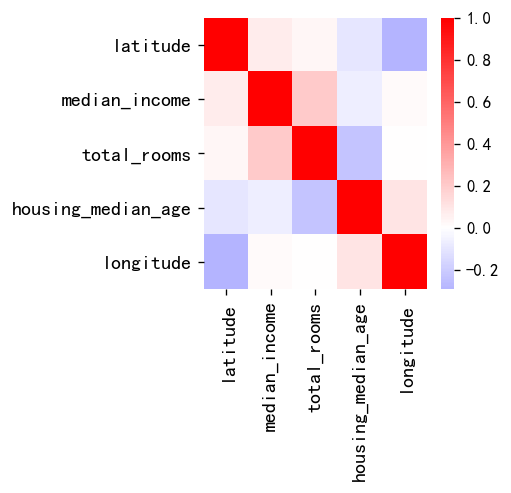

In [50]:
corr_matrix = result_woe.corr()
plt.figure(figsize=(3,3))
sns.heatmap(corr_matrix, cmap = 'bwr', center=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Model Training

In [51]:
model = lrsc.LogisticRegressionScoreCard(trans_woe, PDO=-20, basePoints=100, verbose=True)
model.fit(result_woe, y)

Access the Scorecard rule table by attribute `woe_df_`. This is the Scorecard model.

In [52]:
model.woe_df_

,feature,value,woe,beta,score
0,latitude,-inf~34.0,-0.126659,1.443634,15.0
1,latitude,34.0~37.6,0.300017,1.443634,32.0
2,latitude,37.6~inf,-0.447097,1.443634,1.0
3,median_income,-inf~2.875,-2.194393,1.078135,-48.0
4,median_income,2.875~3.5625,-1.056799,1.078135,-13.0
5,median_income,3.5625~3.9625,-0.681424,1.078135,-1.0
6,median_income,3.9625~5.102880000000001,-0.295228,1.078135,11.0
7,median_income,5.102880000000001~5.765463,0.388220,1.078135,32.0
8,median_income,5.765463~6.340365,0.909407,1.078135,48.0
9,median_income,6.340365~6.953202,1.355401,1.078135,62.0


Scorecard should be applied on the **original feature values** (before discretization and WOE encoding).

Users can manually adjust the Scorecard rules (as shown below, or output excel files to local position, edit it in excel and load it), and use `load_scorecard` parameter of predict() to load the adjusted rule table. See details in the documentation of `load_scorecard`.

Assuming we want to change the highest score for `housing_median_age` from 62 to 61.

In [53]:
sc_table = model.woe_df_.copy()
sc_table['score'][(sc_table.feature=='housing_median_age') & (sc_table.value=='45.0~inf')] = 61
sc_table

E:\Installments\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,feature,value,woe,beta,score
0,latitude,-inf~34.0,-0.126659,1.443634,15.0
1,latitude,34.0~37.6,0.300017,1.443634,32.0
2,latitude,37.6~inf,-0.447097,1.443634,1.0
3,median_income,-inf~2.875,-2.194393,1.078135,-48.0
4,median_income,2.875~3.5625,-1.056799,1.078135,-13.0
5,median_income,3.5625~3.9625,-0.681424,1.078135,-1.0
6,median_income,3.9625~5.102880000000001,-0.295228,1.078135,11.0
7,median_income,5.102880000000001~5.765463,0.388220,1.078135,32.0
8,median_income,5.765463~6.340365,0.909407,1.078135,48.0
9,median_income,6.340365~6.953202,1.355401,1.078135,62.0


In [54]:
result = model.predict(X[feature_list], load_scorecard=sc_table) # Scorecard should be applied on the original feature values
result_val = model.predict(X_val[feature_list], load_scorecard=sc_table) # Scorecard should be applied on the original feature values
result.head() # if model object's verbose parameter is set to False, predict will only return Total scores

,latitude,median_income,total_rooms,housing_median_age,longitude,TotalScore
0,15.0,11.0,27.0,25.0,4.0,82.0
1,32.0,11.0,27.0,7.0,4.0,81.0
2,15.0,-13.0,14.0,25.0,4.0,45.0
3,1.0,11.0,27.0,7.0,48.0,94.0
4,32.0,-48.0,14.0,25.0,4.0,27.0


In [55]:
# # OR if we load rules from local position.
sc_table = pd.read_excel('rules')

model = lrsc.LogisticRegressionScoreCard(woe_transformer=None, verbose=True)
result = model.predict(X[feature_list], load_scorecard=sc_table) # Scorecard should be applied on the original feature values
result_val = model.predict(X_val[feature_list], load_scorecard=sc_table) # Scorecard should be applied on the original feature values
result.head() # if model object's verbose parameter is set to False, predict will only return Total scores

,latitude,median_income,total_rooms,housing_median_age,longitude,TotalScore
0,15.0,11.0,27.0,25.0,4.0,82.0
1,32.0,11.0,27.0,7.0,4.0,81.0
2,15.0,-13.0,14.0,25.0,4.0,45.0
3,1.0,11.0,27.0,7.0,48.0,94.0
4,32.0,-48.0,14.0,25.0,4.0,27.0


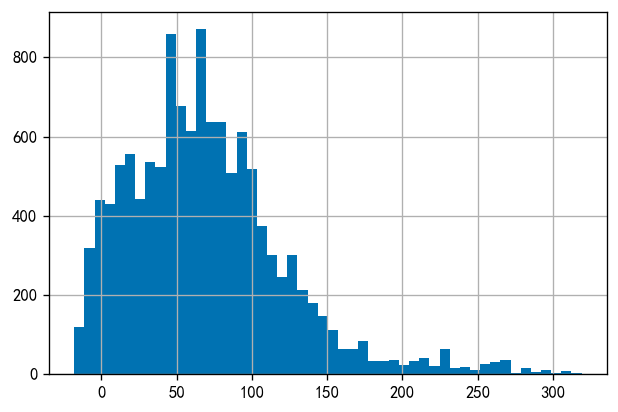

In [56]:
result['TotalScore'].hist(bins=50)

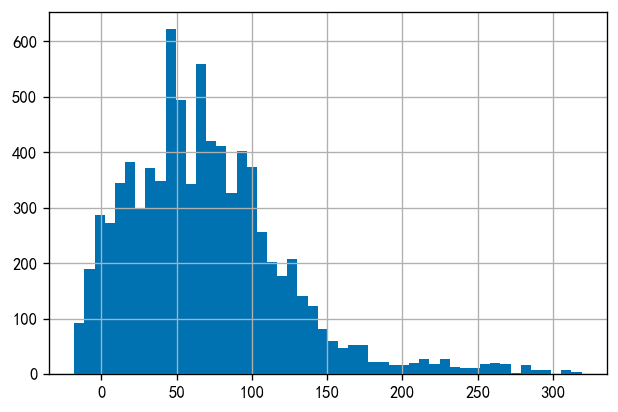

In [57]:
result_val['TotalScore'].hist(bins=50)

### Model Evaluation

#### Train

In [58]:
evaluation = me.BinaryTargets(y, result['TotalScore'])

In [59]:
evaluation.ks_stat()

0.632894375634659

KS = 0.633


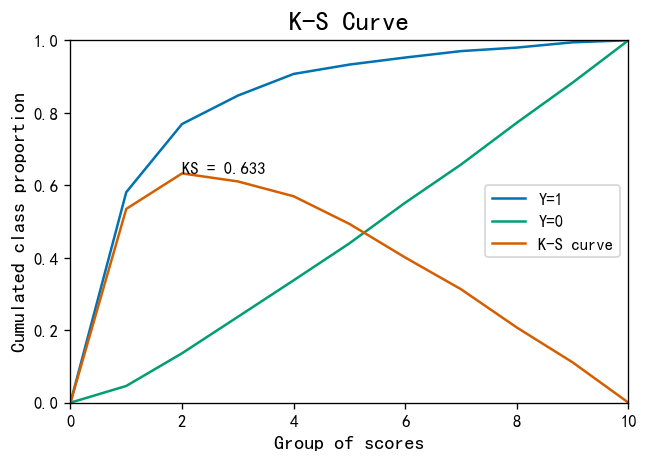

In [60]:
evaluation.plot_ks()

AUC: 0.8932301321830068


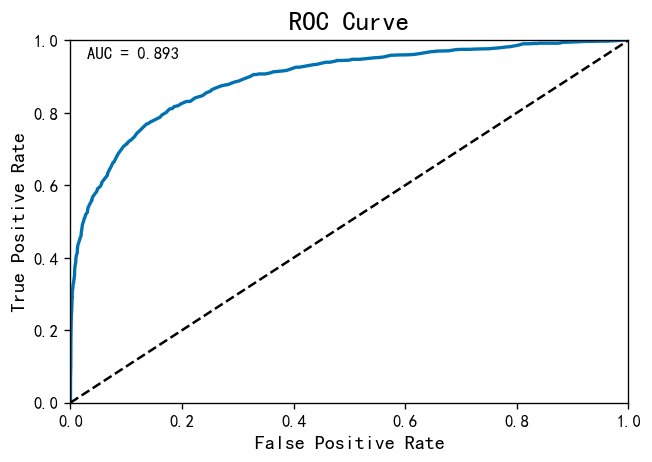

In [61]:
evaluation.plot_roc()

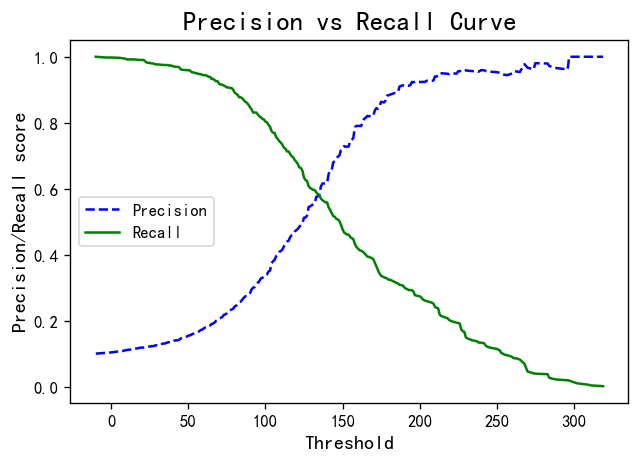

In [62]:
evaluation.plot_precision_recall()

KS = 0.633


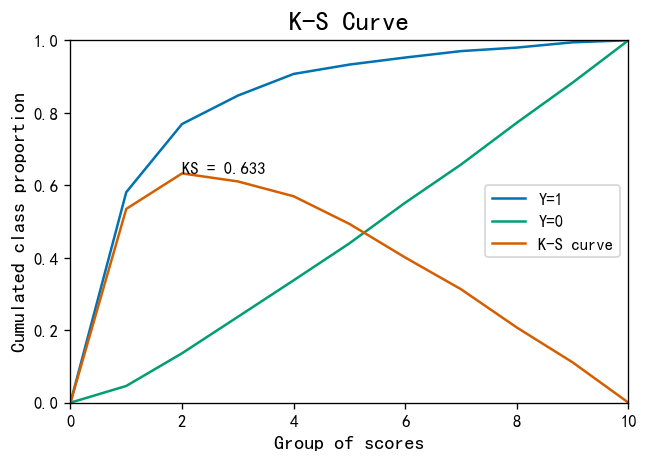

AUC: 0.8932301321830068


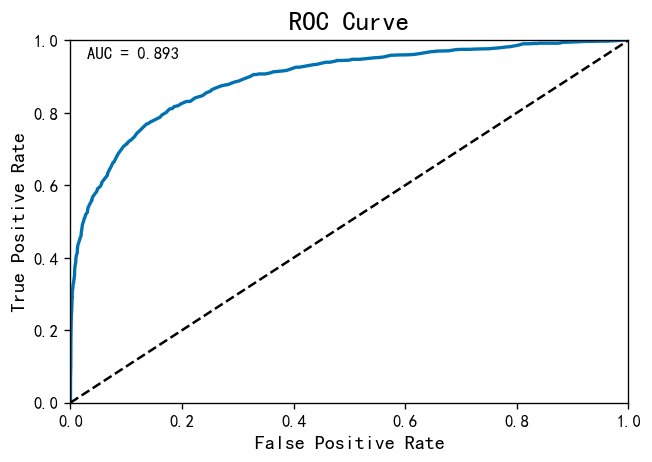

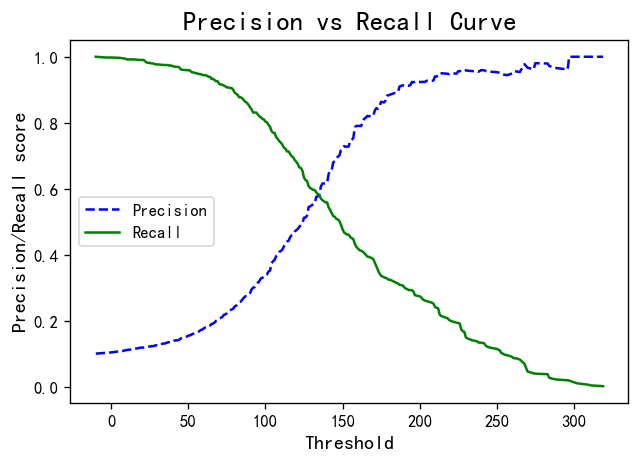

In [63]:
evaluation.plot_all()

#### Validation

KS = 0.608


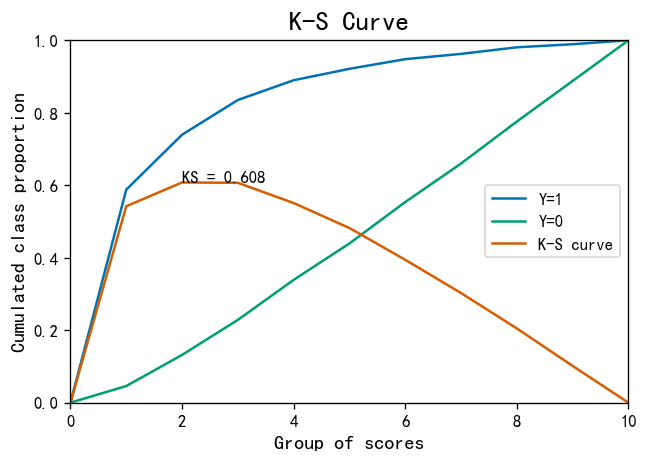

AUC: 0.8861875109594125


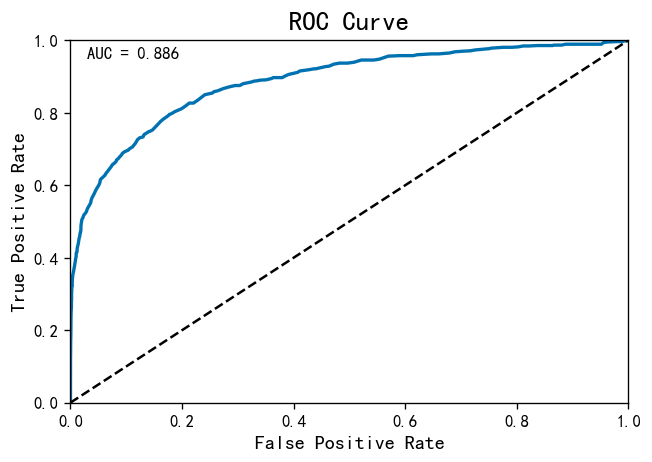

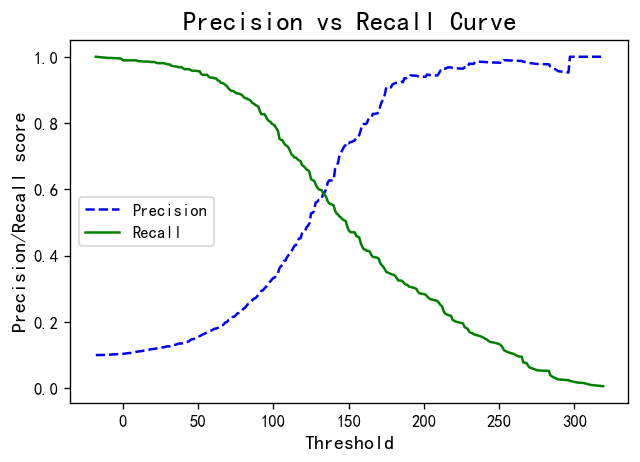

In [64]:
evaluation = me.BinaryTargets(y_val, result_val['TotalScore'])
evaluation.plot_all()